# Shaping de la forward curve markit

## Forward Curve TGP

In [65]:
# on recupere la donnee en time serie de KDB
from kdb import *
import pandas as pd
from ratios.ratio import Ratio
from ratios.scope import Scope
from ratios.ratio import Ratio
from ratios.profiles.filters.filter import Filter
from ratios.smoothings.smoothing import Smoothing
from ratios.smoothings.integral_cubic_spline import IntegralCubicSpline
from ratios.profiles.baseload import Baseload
from ratios.profiles.filters.hours import Hours
from ratios.profiles.filters.months import Months
from ratios.profiles.filters.years import Years
from ratios.profiles.off_peak import OffPeak, OverlappingIndexesPeakAndOffPeak
from ratios.profiles.peak import Peak
from ratios.scope import Scope

# donnee markit du 21
data_fr_month_markit = Shape('2022-09-21', "FRANCE_BL", "Month")["Markit"]
data_fr_qua_markit = Shape('2022-09-21', "FRANCE_BL", "Quarter")["Markit"]
data_fr_cal_markit = Shape('2022-09-21', "FRANCE_BL", "Year")["Markit"]

# donnee tgp du 21
data_fr_month_tgp = Shape('2022-09-21', "FRANCE_BL", "Month")["TGP"]
data_fr_qua_tgp = Shape('2022-09-21', "FRANCE_BL", "Quarter")["TGP"]
data_fr_cal_tgp = Shape('2022-09-21', "FRANCE_BL", "Year")["TGP"]

# donnee markit du 22
data_fr_month_1_markit = Shape('2022-09-22', "FRANCE_BL", "Month")["Markit"]
data_fr_qua_1_markit = Shape('2022-09-22', "FRANCE_BL", "Quarter")["Markit"]
data_fr_cal_1_markit = Shape('2022-09-22', "FRANCE_BL", "Year")["Markit"]

# donnee tgp du 22
data_fr_month_1_tgp = Shape('2022-09-21', "FRANCE_BL", "Month")["TGP"]
data_fr_qua_1_tgp = Shape('2022-09-21', "FRANCE_BL", "Quarter")["TGP"]
data_fr_cal_1_tgp = Shape('2022-09-21', "FRANCE_BL", "Year")["TGP"]

Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21


In [81]:
print(data_fr_month_markit.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_qua_markit.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_cal_markit.loc['2023-01-01':'2023-12-01'].mean())

576.0744009291666
575.263517395
574.29248498


In [82]:
print(data_fr_month_tgp.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_qua_tgp.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_cal_tgp.loc['2023-01-01':'2023-12-01'].mean())

578.6007577663864
577.5461848674657
576.0


In [46]:
# On calcule ici le ratio de prix de markit
ratio_quar_cal = Ratio(Baseload(data_fr_qua_markit),  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[Scope.YEAR_NUMBER],
                        column_scope=[Scope.QUARTER]) \
    .compute(numerator_computing_scope=[Scope.YEAR_NUMBER, Scope.QUARTER]).evaluate()

ratio_months_quar = Ratio(Baseload(data_fr_month_markit),  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[Scope.YEAR_NUMBER,Scope.QUARTER],
                        column_scope=[Scope.MONTH_NUMBER]) \
    .compute(numerator_computing_scope=[Scope.QUARTER, Scope.MONTH_NUMBER]).evaluate()

print(ratio_quar_cal.matrix_rate)  
print(ratio_months_quar.matrix_rate)


Start Date         1         2         3         4
Start Date                                        
2023        1.701835  0.663457  0.641876  0.992832
2024        2.005698  0.534793  0.514228  0.945280
2025        1.314209  0.745116  0.781102  1.159574
2026        1.345002  0.738729  0.759044  1.157224
2027        1.338433  0.760353  0.765365  1.135848
2028        1.215827  0.831685  0.849878  1.102609
2022             NaN       NaN       NaN  1.000000
Start Date                   1         2         3         4         5   \
Start Date Start Date                                                     
2023       1           0.460033  0.446380  0.323075       NaN       NaN   
           2                NaN       NaN       NaN  0.493081  0.433166   
           3                NaN       NaN       NaN       NaN       NaN   
           4                NaN       NaN       NaN       NaN       NaN   
2024       1           0.819454  0.795133  0.575490       NaN       NaN   
           2    

In [78]:
Baseload(data_fr_cal_1).shape(ratio_quar_cal).data

Start Date
2023-01-01    968.343998
2024-01-01    549.561323
2025-01-01    283.869129
2026-01-01    249.968711
2027-01-01    216.223823
2028-01-01    185.778367
2029-01-01    132.590000
Name: TGP, dtype: float64

In [77]:
# maintenant on observe une serie de prix cal, on essaie d'en determiner les prix quarters en utilisant les ratios calcules avec les prix de la veille
# plot du graph 
plt.figure(figsize = (30, 10), dpi = 650)
plt.style.use('seaborn')

prix_calcule = Baseload(data_fr_cal_1).shape(ratio_quar_cal).data
plt.plot(Baseload(data_fr_qua_1).shape(ratio_quar_cal).data, color = "blue", label = "Prix recalcule")
plt.plot(data_fr_qua_tgp, color = "green", label = "Prix TGP")
plt.plot(data_fr_qua_1_markit, color = "indianred", label = "Prix Markit")

plt.title(f"Prix Quarter recalcule vs benchmarck")
plt.xlabel("Maturity")
plt.ylabel("Prix")
plt.xticks(rotation=90)
plt.legend();

In [75]:
# maintenant on observe une serie de prix cal, on essaie d'en determiner les prix quarters en utilisant les ratios calcules avec les prix de la veille
# plot du graph 
plt.figure(figsize = (30, 10), dpi = 650)
plt.style.use('seaborn')


plt.plot(Baseload(prix_calcule).shape(ratio_months_quar).data, color = "blue", label = "Prix recalcule")
plt.plot(data_fr_month_1_tgp, color = "green", label = "Prix TGP")
plt.plot(data_fr_month_1_markit, color = "indianred", label = "Prix Markit")


plt.title(f"Prix Quarter recalcule vs benchmarck")
plt.xlabel("Maturity")
plt.ylabel("Prix")
plt.xticks(rotation=90)
plt.legend();

In [74]:
Baseload(prix_calcule).shape(ratio_months_quar).data

Start Date
2022-10-01    275.042185
2023-01-01    753.150763
2023-04-01    122.588297
2023-07-01    111.299495
2023-10-01    274.679253
2024-01-01    919.295026
2024-04-01    101.268373
2024-07-01     91.732185
2024-10-01    246.285292
2025-01-01    608.353178
2025-04-01    148.027852
2025-07-01    142.774258
2025-10-01    328.275383
2026-01-01    624.409215
2026-04-01    147.524211
2026-07-01    139.621132
2026-10-01    328.807230
2027-01-01    628.340354
2027-04-01    153.798836
2027-07-01    142.688702
2027-10-01    326.693041
2028-01-01    573.717473
2028-04-01    168.376643
2028-07-01    158.456123
2028-10-01    318.232945
2029-01-01    163.722026
2029-04-01    108.344730
2029-07-01    110.967368
2029-10-01    147.739123
2030-01-01    159.232026
2030-04-01    103.854730
Name: TGP, dtype: float64

In [70]:
prix_calcule

Start Date
2022-10-01     990.000000
2023-01-01    1637.165072
2023-04-01     248.617088
2023-07-01     235.566042
2023-10-01     574.557850
2024-01-01    1121.839111
2024-04-01      78.157733
2024-07-01      74.267061
2024-10-01     234.255266
2025-01-01     370.070383
2025-04-01     122.470269
2025-07-01     134.654828
2025-10-01     285.855670
2026-01-01     325.798648
2026-04-01     105.628142
2026-07-01     111.210810
2026-10-01     245.829272
2027-01-01     270.975132
2027-04-01      99.679011
2027-07-01     101.430016
2027-10-01     205.225811
2028-01-01     223.629525
2028-04-01     106.917099
2028-07-01     111.484784
2028-10-01     184.809160
2029-01-01     163.722026
2029-04-01     108.344730
2029-07-01     110.967368
2029-10-01     147.739123
2030-01-01     159.232026
2030-04-01     103.854730
Name: TGP, dtype: float64

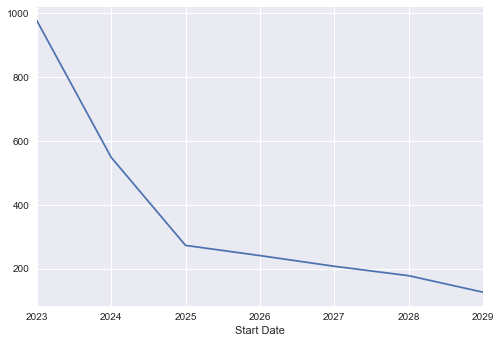

In [49]:
Baseload(data_fr_cal_1).shape(ratio_month_day)
# Plot the peak data
Baseload(data_fr_cal).shape(ratio_month_day).data.plot()
plt.show()

TIMELINE               2016      2017      2018      2019
TIMELINE TIMELINE                                        
2016     1         1.515349       NaN       NaN       NaN
         2         1.268523       NaN       NaN       NaN
         3         1.235716       NaN       NaN       NaN
         4         0.917230       NaN       NaN       NaN
2017     1              NaN  0.794155       NaN       NaN
         2              NaN  0.969154       NaN       NaN
         3              NaN  1.155619       NaN       NaN
         4              NaN  0.969582       NaN       NaN
2018     1              NaN       NaN  0.996769       NaN
         2              NaN       NaN  0.894072       NaN
         3              NaN       NaN  0.697119       NaN
         4              NaN       NaN  0.874264       NaN
2019     1              NaN       NaN       NaN  0.924495
         2              NaN       NaN       NaN  0.942173
         3              NaN       NaN       NaN  1.122409
         4    

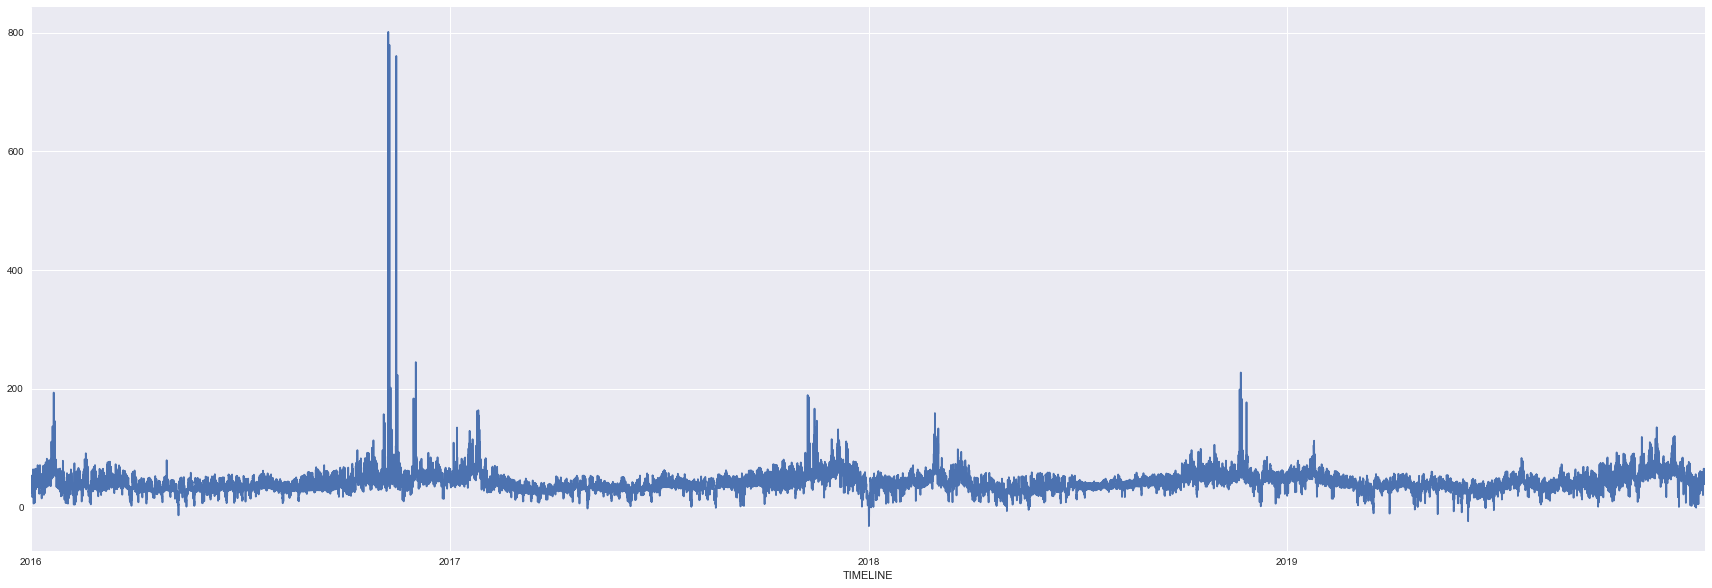

In [50]:
# First we define a {Baseload}
auction = auctions_kdb()
historical_baseload = Baseload(auction["AUCTION_PRICE"])

# On calcule ici le ratio de prix par annee entre les quarters et les mois 
# Line is Denominator when Column is Nominator
ratio_month_day = Ratio(historical_baseload,  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[ Scope.YEAR_NUMBER, Scope.QUARTER],
                        column_scope=[Scope.YEAR_NUMBER]) \
    .compute(numerator_computing_scope=[ Scope.MONTH_NUMBER]).evaluate()

print(ratio_month_day.matrix_rate)

plt.figure(figsize = (30, 10))

# Given a pandas timeseries such as `forward_hourly_timeserie`

# First we create a {Baseload} and apply smoothing using {Scope}s.
peak = Peak(auction["AUCTION_PRICE"])#.smooth(IntegralCubicSpline([Scope.YEAR_NUMBER, Scope.MONTH_NUMBER]))

# Second we define the {Peak} based on the `forward_baseload`
# we define it by filtering to get only {Hours} 1 and 3 and the {Weekdays} Saturday.

# Let's shape the peak with the ratio_month_day 
peak.shape(ratio_month_day)

# Plot the peak data
peak.data.plot()
plt.show()
